In [79]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import copy

In [80]:
source_dir = "images/"
save_dir = "save/"

In [81]:
def show_image(image, title=None, save_name=None):
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    if save_name is not None:
        plt.savefig(save_dir + save_name)
    plt.show()

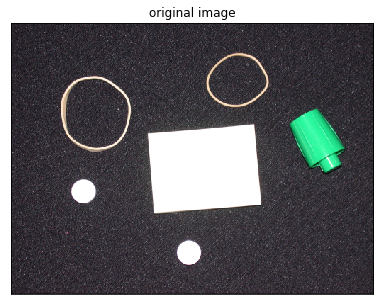

In [82]:
source_image = cv2.imread(source_dir + "shapes.png")
show_image(source_image, "original image")

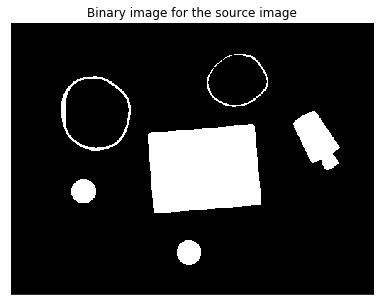

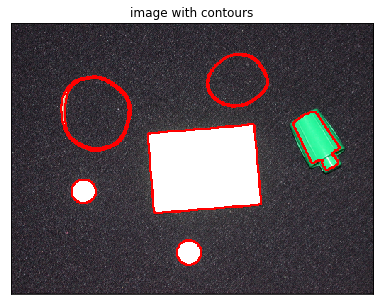

In [84]:
image_with_contours = np.copy(source_image)
grayscale = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)
# smoothed = cv2.medianBlur(grayscale, 5)
smoothed = cv2.GaussianBlur(grayscale, (9, 9), 0)
_, thresh = cv2.threshold(smoothed, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(thresh, "Binary image for the source image")
contours, hierarchi = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image_with_contours, contours, -1, (0,0,255), 2)
show_image(image_with_contours, "image with contours", "3-detected_contours")